In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2
import datetime
import numpy as np

## Load training and testing data

### Local data

### MNIST dataset

### Local data

In [2]:
x_local = []
y_local = []
for i in range(10):
    for d in os.listdir("./imgs/digits/{}".format(i)):
        t_img = cv2.imread("./imgs/digits/{}".format(i)+"/"+d)
        t_img = cv2.cvtColor(t_img, cv2.COLOR_BGR2GRAY)
        x_local.append(t_img)
        y_local.append(i)

x_local = np.array(x_local)
y_local = np.array(y_local)

### MNIST DATA

In [3]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

x_mnist = np.concatenate((x_train_mnist, x_test_mnist))
y_mnist = np.concatenate((y_train_mnist, y_test_mnist))

# train_size = 0.7
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0, random_seed=2019)


Remove zero digits from the dataset

In [4]:
x_mnist_tmp = []
y_mnist_tmp = []
zero_counter = 0
for image, value in zip(x_mnist, y_mnist):
    if value == 0:
        zero_counter += 1
        continue
    x_mnist_tmp.append(image)
    y_mnist_tmp.append(value)

x_mnist = np.array(x_mnist_tmp)
y_mnist = np.array(y_mnist_tmp)

print(f"Removed {zero_counter} zeros")

Removed 6903 zeros


### CONCANATE BOTH DATASETS

In [5]:
x = np.concatenate((x_local, x_mnist))
y = np.concatenate((y_local, y_mnist))

Create training and testing data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state= 21)

Check dimensions of all used datasets

In [7]:
print("Local data:")

print(f"x_local size: {x_local.shape}")
print(f"y_local size: {y_local.shape}")

print()
print("MNIST data:")

print(f"x_mnist size: {x_mnist.shape}")
print(f"y_mnist size: {y_mnist.shape}")

print()
print("Concatanated data:")

print(f"x size: {x.shape}")
print(f"y size: {y.shape}")

print()
print("Training data:")

print(f"x_train size: {x_train.shape}")
print(f"y_train size: {y_train.shape}")


print()
print("Testing data:")

print(f"x_test size: {x_test.shape}")
print(f"y_test size: {y_test.shape}")



Local data:
x_local size: (3456, 28, 28)
y_local size: (3456,)

MNIST data:
x_mnist size: (63097, 28, 28)
y_mnist size: (63097,)

Concatanated data:
x size: (66553, 28, 28)
y size: (66553,)

Training data:
x_train size: (53242, 28, 28)
y_train size: (53242,)

Testing data:
x_test size: (13311, 28, 28)
y_test size: (13311,)


Remove extra references to minimize confusion

In [8]:
del x, y, x_local, y_local, x_mnist, y_mnist, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist  

## Reshape the data

In [9]:
x_train.shape

(53242, 28, 28)

In [10]:
x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32').shape

(53242, 28, 28, 1)

In [11]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (53242, 28, 28, 1)
x_test: (13311, 28, 28, 1)
y_train: (53242, 10)
y_test: (13311, 10)


In [13]:
num_classes

10

In [14]:
def larger_model():
    # create model
	model = keras.Sequential(
    [
        Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(),
        Conv2D(15, (3, 3), activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(50, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    

    # Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


In [15]:
model = larger_model()
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [16]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=10,callbacks=[tensorboard_callback])
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

print("CNN results:")
print(f"Test loss: {round(scores[0] * 100, 2)} %") 
print(f"Test accuracy: {round(scores[1] * 100, 2)} %") 

Epoch 1/10
5325/5325 [==============================] - 40s 7ms/step - loss: 0.2135 - accuracy: 0.9309 - val_loss: 0.1067 - val_accuracy: 0.9663
Epoch 2/10
5325/5325 [==============================] - 39s 7ms/step - loss: 0.0908 - accuracy: 0.9722 - val_loss: 0.0638 - val_accuracy: 0.9811
Epoch 3/10
5325/5325 [==============================] - 40s 8ms/step - loss: 0.0651 - accuracy: 0.9798 - val_loss: 0.0630 - val_accuracy: 0.9816
Epoch 4/10
5325/5325 [==============================] - 38s 7ms/step - loss: 0.0544 - accuracy: 0.9828 - val_loss: 0.0446 - val_accuracy: 0.9885
Epoch 5/10
5325/5325 [==============================] - 38s 7ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 0.0491 - val_accuracy: 0.9863
Epoch 6/10
5325/5325 [==============================] - 39s 7ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0530 - val_accuracy: 0.9863
Epoch 7/10
5325/5325 [==============================] - 40s 8ms/step - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.0448 - val_ac

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 15)          0         
                                                                 
 flatten (Flatten)           (None, 375)               0

In [40]:
from keras_visualizer import visualizer 

visualizer(model, format='png', view=True)


ValueError: Keras Visualizer: Error while visualizing

In [41]:
plot_model(model, show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [19]:
scores

[0.04630366340279579, 0.9888062477111816]

In [20]:
pred = model.predict(x_test) 
classes_x = np.argmax(pred,axis=1)
print(classes_x)

[6 1 6 ... 3 4 3]


In [21]:
def get_predicted_number(predictions):
    return max(range(len(predictions)), key=predictions.__getitem__)

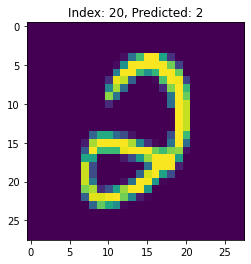

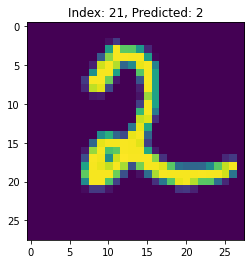

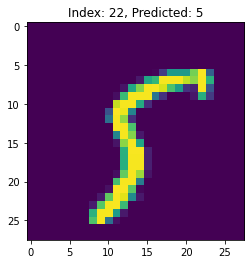

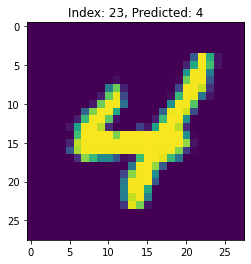

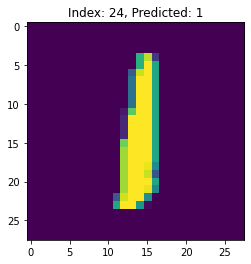

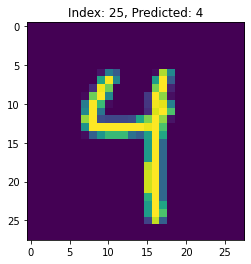

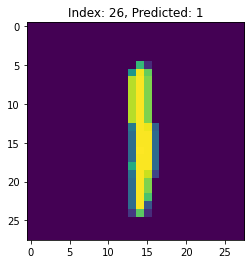

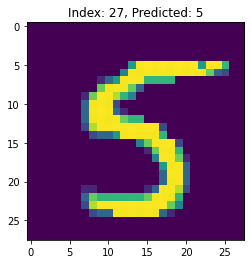

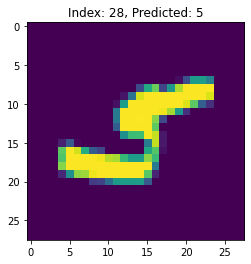

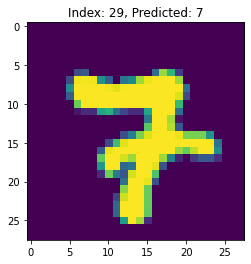

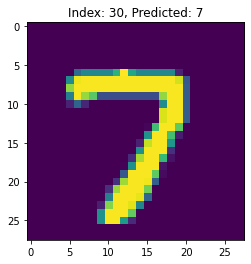

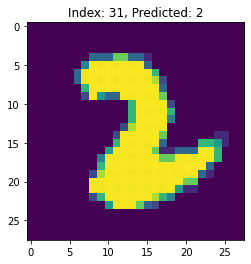

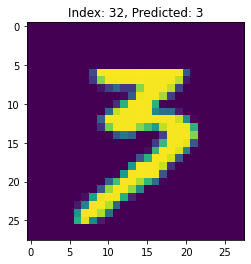

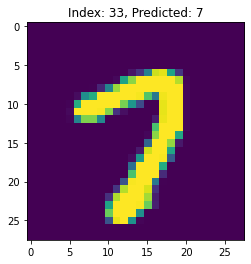

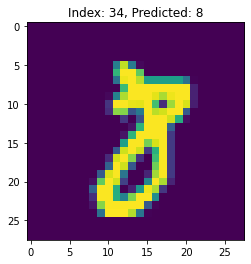

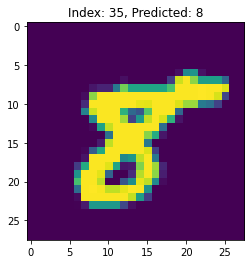

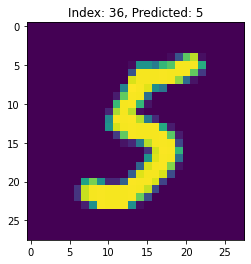

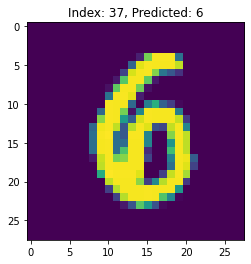

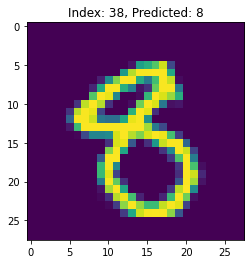

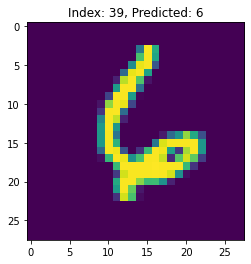

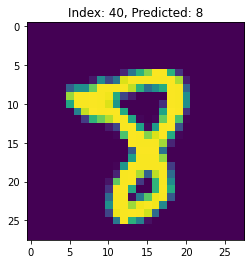

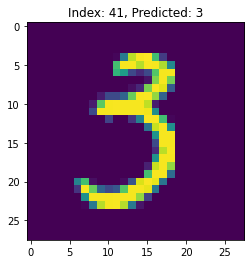

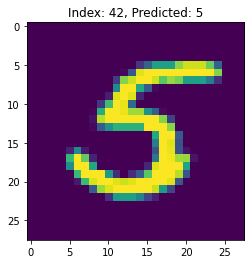

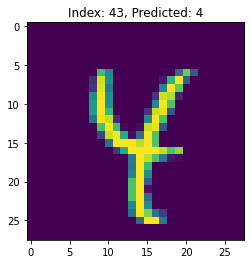

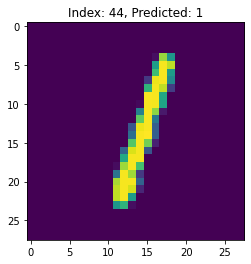

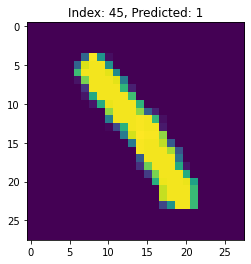

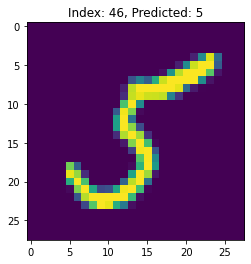

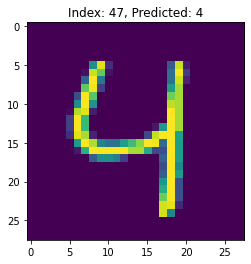

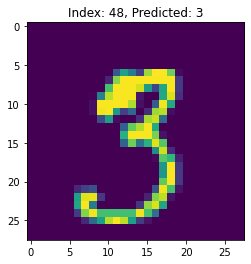

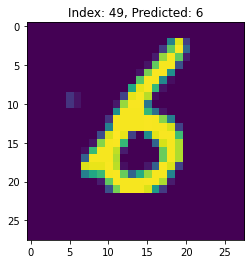

In [22]:

for i in range(20, 50):
    
    plt.imshow(x_test[i])
    # plt.title("Index:", i, "Predicted:", get_predicted_number(pred[i]))
    plt.title(f"Index: { i }, Predicted: { get_predicted_number(pred[i]) }")
    plt.show()

In [23]:
def print_certainties(predictions):
    for index, prediction in enumerate(predictions):
        print(f"Certainty of { index } is { round(prediction * 100, 3) } %")

In [24]:
print_certainties(pred[14])

Certainty of 0 is 0.0 %
Certainty of 1 is 0.0 %
Certainty of 2 is 0.0 %
Certainty of 3 is 0.0 %
Certainty of 4 is 0.001 %
Certainty of 5 is 0.0 %
Certainty of 6 is 0.0 %
Certainty of 7 is 0.0 %
Certainty of 8 is 0.0 %
Certainty of 9 is 99.999 %


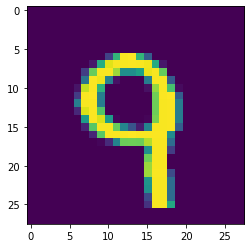

In [25]:
plt.imshow(x_test[14])

In [26]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [27]:
model.save("trained_model")

INFO:tensorflow:Assets written to: trained_model\assets


In [28]:
datagen_train = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally 
    height_shift_range=0.2,# randomly shift images vertically 

    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
# datagen_train.fit(x_train)


In [29]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        rotation_range=45, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [30]:
datagen.fit(x_train)

In [31]:
testing_model = larger_model()

In [32]:
# solving "Your input ran out of data"
# with  https://stackoverflow.com/questions/59864408/tensorflowyour-input-ran-out-of-data

image_count = x_train.shape[0]
BATCH_SIZE = 32
EPOCHS = 10

TRAIN_STEPS_PER_EPOCH = np.ceil((image_count * 0.8 / BATCH_SIZE) - 1)
# to ensure that there are enough images for training bahch
VAL_STEPS_PER_EPOCH = np.ceil((image_count * 0.2 / BATCH_SIZE) - 1)


In [33]:
testing_model.fit(
        datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
        validation_data=(x_test, y_test),
        epochs=EPOCHS,
        steps_per_epoch=TRAIN_STEPS_PER_EPOCH,
        callbacks=[tensorboard_callback],
        verbose=1)

Epoch 1/10
1331/1331 [==============================] - 31s 23ms/step - loss: 1.9425 - accuracy: 0.3278 - val_loss: 2.3079 - val_accuracy: 0.1211
Epoch 2/10
1331/1331 [==============================] - 30s 23ms/step - loss: 1.2017 - accuracy: 0.6055 - val_loss: 2.9748 - val_accuracy: 0.1211
Epoch 3/10
1331/1331 [==============================] - 30s 23ms/step - loss: 0.9491 - accuracy: 0.6958 - val_loss: 3.4277 - val_accuracy: 0.1211
Epoch 4/10
1331/1331 [==============================] - 30s 22ms/step - loss: 0.8133 - accuracy: 0.7447 - val_loss: 4.5910 - val_accuracy: 0.1211
Epoch 5/10
1331/1331 [==============================] - 31s 24ms/step - loss: 0.7291 - accuracy: 0.7714 - val_loss: 3.8565 - val_accuracy: 0.0439
Epoch 6/10
1331/1331 [==============================] - 36s 27ms/step - loss: 0.6747 - accuracy: 0.7874 - val_loss: 5.4755 - val_accuracy: 0.0031
Epoch 7/10
1331/1331 [==============================] - 34s 26ms/step - loss: 0.6312 - accuracy: 0.8006 - val_loss: 5.7851 -

In [34]:
scores = testing_model.evaluate(x_test, y_test, verbose=0)


print("CNN results:")
print('Test loss:', scores[0] * 100) 
print('Test accuracy:', scores[1] * 100)

CNN results:
Test loss: 506.16016387939453
Test accuracy: 0.8489219471812248


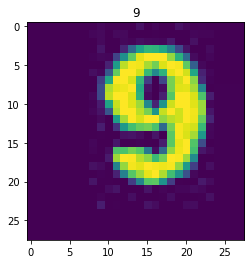

In [35]:
image_index = 88
plt.imshow(x_test[image_index])
plt.title(np.argmax(model.predict(x_test[image_index:image_index + 1])))
print()